In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import matplotlib.gridspec as gs
duration = 2.3 # [T] = ms -> [rate] = kHz
from matplotlib.lines import Line2D
import seaborn as sns

def save_plot(fig, name, size=(6, 3)):
    orig = fig.get_size_inches()
    fig.set_size_inches(size)
    
    fig.savefig(name + ".pgf", bbox_inches="tight", transparent=True)
    try:
        fig.savefig(name + ".pdf", bbox_inches="tight", transparent=True)
    except:
        print("couldnt save pdf")
    fig.set_size_inches(orig)


def pseudo_adc_conversion_analog(adc_set, round_until=1):
    """
    returns the voltage in mV measured for the value set in the c programm

    :param adc_set: int, limits: (0,1022)
    :param round_until:
    :return:
    """
    if isinstance(adc_set, (list, np.ndarray)):
        if (adc_set > 1022).any() or (adc_set < 0).any():
            raise ValueError("adc_set can only be within 0 and 1022")
    elif adc_set > 1022 or adc_set < 0:
        raise ValueError("adc_set can only be within 0 and 1022")
    return np.round(1.748648648648649 * adc_set + 14.162162162162161, decimals=round_until)

def pseudo_adc_conversion(digital_pseudo_unit):
    # converts the digital value of the adc into millivolt
    # see ipython notebook: Pseudo ADC Calibration
    return 0.681 * digital_pseudo_unit - 865.713


NUM_COLORS = 12
colors = sns.color_palette("hls", NUM_COLORS)
# ax.set_color_cycle([scalarMap.to_rgba(i) for i in range(NUM_COLORS)])

def true_input_spike_rate(input_rate):
    return input_rate*2.3e-3
def true_output_spike_rate(output_rate):
    return output_rate/2.3e-3


<ipython-input-1-b091784ff29b>:2: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  import matplotlib.pyplot as plt


In [16]:
pseudo_adc_conversion_analog(300) - pseudo_adc_conversion_analog(301)

-1.7000000000000455

In [14]:
print(pseudo_adc_conversion_analog(250)/1000, pseudo_adc_conversion_analog(350)/1000)

0.45130000000000003 0.6262000000000001


# Theoretical Activation Functions

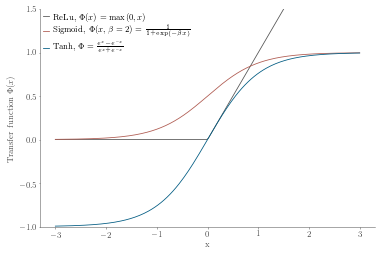

In [66]:
relu = lambda x: np.maximum(0,x)
def fsigmoid(x, a=2, b=0):
    return 1.0 / (1.0 + np.exp(-a*(x-b)))

def dsig(x):
    return fsigmoid(x)*(1-fsigmoid(x))
def drelu(x):
    return (1 * (x >= 0)).astype(int)
def dtanh(x):
    return np.cosh(x)**-2
# tanh from numpy

x = np.linspace(-3,3,200)
fig = plt.figure()
plt.plot(x, relu(x), label="ReLu, $\Phi(x) = \mathrm{max}(0,x)$")
plt.plot(x, fsigmoid(x), label="Sigmoid, $\Phi(x, \\beta=2) = \\frac{1}{1 + \\exp(-\\beta x)}$")
plt.plot(x, np.tanh(x), label="Tanh, $\Phi(x) = \\frac{e^x - e^{-x}}{e^x + e^{-x}}$")
plt.ylim(-1,1.5)
plt.legend()
plt.xlabel("x")
plt.ylabel("Transfer function $\Phi(x)$")
save_plot(fig, "deeplearning_activation_functions", (4,3))

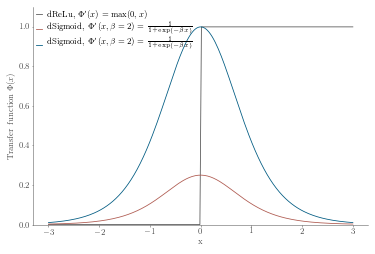

In [90]:
x = np.linspace(-3,3,200)
fig = plt.figure()
plt.plot(x, drelu(x), label="dReLu, $\Phi'(x) = \mathrm{max}(0,x)$")
plt.plot(x, dsig(x), label="dSigmoid, $\Phi'(x, \\beta=2) = \\frac{1}{1 + \\exp(-\\beta x)}$")

plt.plot(x, dtanh(x), label="dSigmoid, $\Phi'(x, \\beta=2) = \\frac{1}{1 + \\exp(-\\beta x)}$")
#plt.plot(x, dtanh(x), label="a")
plt.legend()
plt.ylim(0,1.1)
plt.xlabel("x")
plt.ylabel("Transfer function $\Phi(x)$")
save_plot(fig, "deeplearning_activation_functions_derivative", (4,3))

In [7]:
pseudo_adc_conversion_analog(301) - pseudo_adc_conversion_analog(300)  

1.7000000000000455

In [6]:
pseudo_adc_conversion_analog(300)

538.8

In [9]:
files = ["output_spikes_1573574858.npy","output_spikes_1573574960.npy","output_spikes_1573575034.npy","output_spikes_1573575179.npy"]
data = np.zeros((4, 4, 37,32))
for i, f in enumerate(files):
    data[i] = true_output_spike_rate(np.load(f))/1e3
    

# input rates
input_weights = [5,15,30,60]
input_rates = true_input_spike_rate(np.linspace(-560, 560, 37))*1e3

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


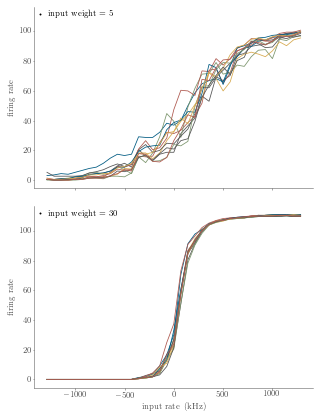

In [10]:
mmnt = 0
fig, axes = plt.subplots(nrows=2, figsize =(5,7), sharey=True, sharex=True)
  
for i, n_params in enumerate([0,2]):
    ax = axes[i]
    #ax.set_prop_cycle(color=colors)
    ax.set_ylabel("firing rate")
    ax.plot(input_rates,data[mmnt,n_params,:,0:12])
    ax.legend([Line2D([0],[0], marker='o', color="w", markerfacecolor="black")],["input weight = {}".format(input_weights[n_params])], loc="upper left")
ax.set_xlabel("input rate (kHz)")
plt.subplots_adjust(hspace=0.1)
plt.savefig("calibrated_activation_function_input.png",transparent=True, bbox_inches="tight")

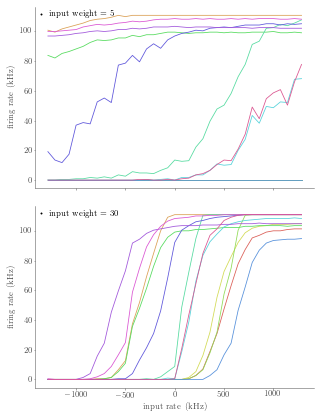

In [11]:
mmnt = 2
fig, axes = plt.subplots(nrows=2, figsize =(5,7), sharey=True, sharex=True)
for i, n_params in enumerate([0,2]):
    ax = axes[i]
    ax.set_prop_cycle(color=colors)
    ax.set_ylabel("firing rate (kHz)")
    ax.plot(input_rates,data[mmnt,n_params,:,0:12])
    ax.legend([Line2D([0],[0], marker='o', color="w", markerfacecolor="black")],["input weight = {}".format(input_weights[n_params])], loc="upper left")
ax.set_xlabel("input rate (kHz)")
plt.subplots_adjust(hspace=0.1)
plt.savefig("uncalibrated_activation_function_input.png",transparent=True, bbox_inches="tight")

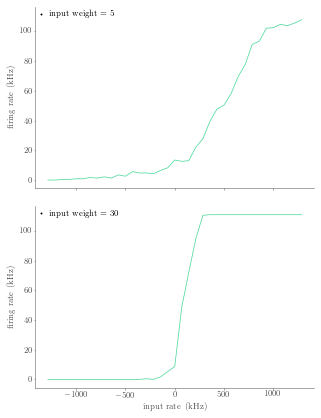

In [12]:
mmnt = 2
fig, axes = plt.subplots(nrows=2, figsize =(5,7), sharey=True, sharex=True)
for i, n_params in enumerate([0,2]):
    ax = axes[i]
    ax.set_prop_cycle(color=colors)
    ax.set_ylabel("firing rate (kHz)")
    for j in range(12):
        alpha = 0
        if j == 5:
            alpha = 1
        ax.plot(input_rates,data[mmnt,n_params,:,j], alpha = alpha)
    ax.legend([Line2D([0],[0], marker='o', color="w", markerfacecolor="black")],["input weight = {}".format(input_weights[n_params])], loc="upper left")
ax.set_xlabel("input rate (kHz)")
plt.subplots_adjust(hspace=0.1)
plt.savefig("uncalibrated_activation_function_input_single.png",transparent=True, bbox_inches="tight")

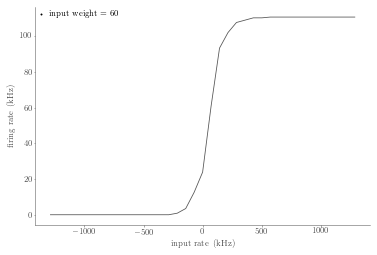

In [13]:
mmnt = 0
n_params = 3
figure = plt.figure()    
plt.ylabel("firing rate (kHz)")
plt.xlabel("input rate (kHz)")
plt.plot(input_rates,data[mmnt,n_params,:,1])
plt.legend([Line2D([0],[0], marker='o', color="w", markerfacecolor="black")],
           ["input weight = {}".format(input_weights[n_params])])

plt.savefig("single_calibrated_activation_function_input_w{}.png".format(input_weights[n_params]),transparent=True, bbox_inches="tight")

NameError: name 'input_rates' is not defined

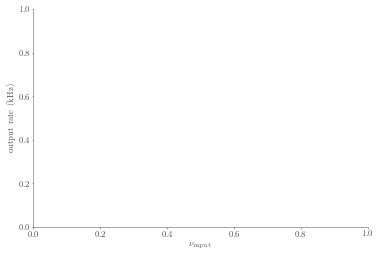

In [43]:
mmnt = 0
nrn = 9
figure = plt.figure()    
plt.ylabel("output rate (kHz)")
plt.xlabel("$\\nu_\mathrm{input}$")
for p in range(4):
    plt.plot(input_rates,data[mmnt,p,:,nrn], label="input weight %s" % input_weights[p])
    #plt.legend([Line2D([0],[0], marker='o', color="w", markerfacecolor="black")],
    #           ["input weight = {}".format(input_weights[p])])
plt.legend()
plt.show()
save_plot(figure, "single_calibrated_transfer_function_w_various_weights")

## Activation Function Origin

In [7]:
mmnts = ["membrane_data_0.npy", "membrane_data_1.npy"]
input_rates = [0, true_input_spike_rate(100)]
noise_rates = true_input_spike_rate(70)
full_data = np.zeros((2,26137))
for i in range(2):
    full_data[i] = np.load(mmnts[i])[:26137]

from scipy.stats import entropy
import pandas as pd
    
def gaus(x, mue, sig):
    return np.exp(-(x - mue) ** 2 / (2 * sig ** 2)) / sig / np.sqrt(2 * np.pi)

NameError: name 'pd' is not defined

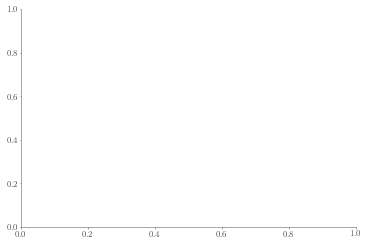

In [44]:
fig, axes = plt.subplots(nrows=1)
for i in range(1):
    ax = axes
    kullback_leibler_divergence = []
    data = pd.Series(full_data[i]).dropna()
    y, x = np.histogram(data, bins=200)
    x = x[1:] - (x[1] - x[0]) / 2
    std = data.std()
    mean = data.mean()
    kb_lb_entropy = entropy(y, gaus(x, mean, std))
    kullback_leibler_divergence +=  [kb_lb_entropy, ]
    ax.set_ylabel("Density")
    
    ax.plot(x, gaus(x, mean, std))
    ax.axvline(mean, linestyle="--")
    ax.text(mean+2, 0.02,'$V_{leak}$')
    ax.hist(data,bins=200,alpha=0.3, density=True)
    #ax.legend(["Gaussian Fit", "$V_{leak}$", "Histogram"], loc="upper left")
ax.set_xlabel("Membrane Potential (mV)")
plt.savefig("activation_function_vmem_distr.png",transparent=True, bbox_inches="tight")

<IPython.core.display.Javascript object>


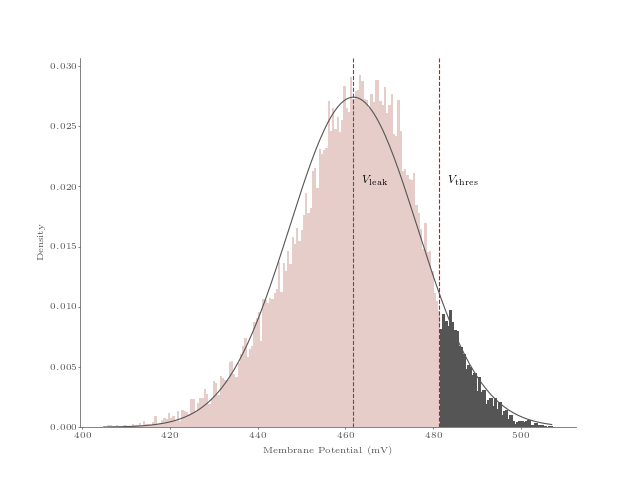

In [19]:
fig, axes = plt.subplots(nrows=1)
for i in range(1):
    ax = axes
    kullback_leibler_divergence = []
    data = pd.Series(full_data[i]).dropna()
    y, x = np.histogram(data, bins=200)
    x = x[1:] - (x[1] - x[0]) / 2
    std = data.std()
    mean = data.mean()
    kb_lb_entropy = entropy(y, gaus(x, mean, std))
    kullback_leibler_divergence +=  [kb_lb_entropy, ]
    
    y_normed, _ = np.histogram(data, bins=200, density=True)
    ax.set_ylabel("Density")
    
    mean_stored = mean
    ax.plot(x, gaus(x, mean, std))
    ax.axvline(mean, linestyle="--")
    ax.text(mean+2, 0.02,'$V_{\mathrm{leak}}$')
    ax.hist(data,bins=200,alpha=0.3, density=True)
    ax.axvline(x[150-1], linestyle="--", color="red")
    ax.text(x[150-1]+2, 0.02,'$V_{\mathrm{thres}}$')
    ax.bar(x[150:], y_normed[150:])
    
    #ax.legend(["Gaussian Fit", "$V_{leak}$", "$V_{thres}$", "Histogram", "Spiking"], loc="upper left")
ax.set_xlabel("Membrane Potential (mV)")
plt.savefig("activation_function_vmem_distr_with_thres.png",transparent=True, bbox_inches="tight")
plt.savefig("activation_function_vmem_distr_with_thres.pgf",transparent=True, bbox_inches="tight")

<IPython.core.display.Javascript object>


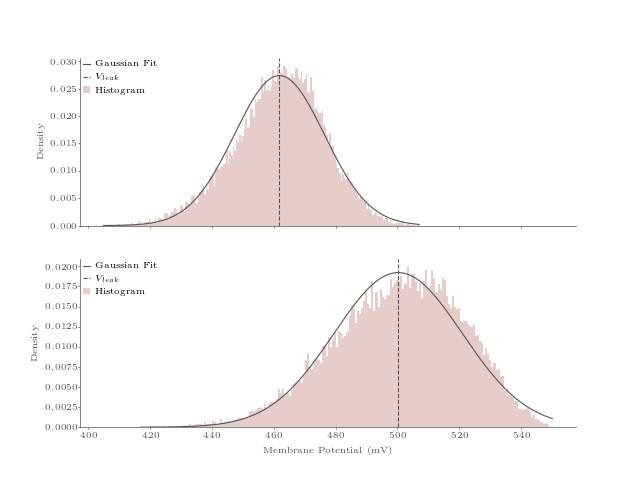

In [10]:
fig, axes = plt.subplots(nrows=2, sharex=True)
for i in range(2):
    ax = axes[i]
    kullback_leibler_divergence = []
    data = pd.Series(full_data[i]).dropna()
    y, x = np.histogram(data, bins=200)
    x = x[1:] - (x[1] - x[0]) / 2
    std = data.std()
    mean = data.mean()
    kb_lb_entropy = entropy(y, gaus(x, mean, std))
    kullback_leibler_divergence +=  [kb_lb_entropy, ]
    ax.set_ylabel("Density")
    
    ax.plot(x, gaus(x, mean, std))
    ax.axvline(mean, linestyle="--")
    
    ax.hist(data,bins=200,alpha=0.3, density=True)
    ax.legend(["Gaussian Fit", "$V_{leak}$", "Histogram"], loc="upper left")
ax.set_xlabel("Membrane Potential (mV)")
plt.savefig("activation_function_vmem_distr_with_input.png",transparent=True, bbox_inches="tight")

<IPython.core.display.Javascript object>


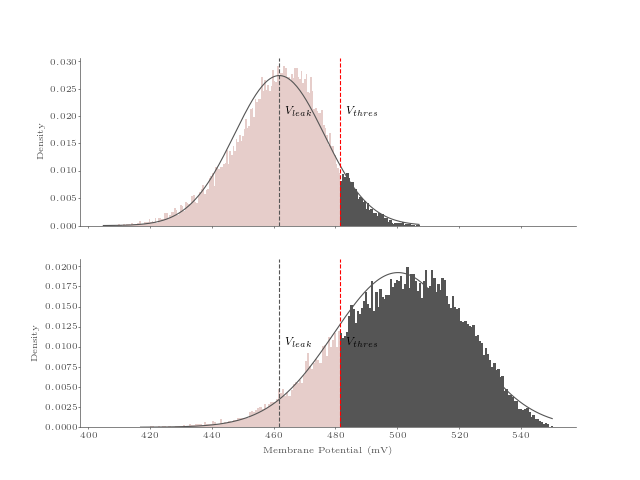

In [11]:
fig, axes = plt.subplots(nrows=2, sharex=True)
for i in range(2):
    ax = axes[i]
    kullback_leibler_divergence = []
    data = pd.Series(full_data[i]).dropna()
    y, x = np.histogram(data, bins=200)
    x = x[1:] - (x[1] - x[0]) / 2
    std = data.std()
    mean = data.mean()
    kb_lb_entropy = entropy(y, gaus(x, mean, std))
    kullback_leibler_divergence +=  [kb_lb_entropy, ]
    
    
    ax.set_ylabel("Density")
    ax.plot(x, gaus(x, mean, std))
    ax.axvline(mean_stored, linestyle="--"),
    ax.hist(data,bins=200,alpha=0.3, density=True)
    
    y_normed, _ = np.histogram(data, bins=200, density=True)
    if i == 0:
        threshold = x[150-1]
        ax.axvline(x[150-1], linestyle="--", color="red")
        
        ax.text(mean_stored+2, 0.02,'$V_{leak}$')
        ax.text(x[150-1]+2, 0.02,'$V_{thres}$')
        ax.bar(x[150:], y_normed[150:]) 
        #ax.legend(["Gaussian Fit", "$V_{leak}$", "$V_{thres}$", "Histogram", "Spiking"], loc="upper left")
    else:
        idx = np.argwhere(x>threshold).T[0]
        ax.axvline(threshold, linestyle="--", color="red")
        ax.text(threshold+2, 0.010,'$V_{thres}$')
        ax.text(mean_stored+2, 0.010,'$V_{leak}$')
        ax.bar(x[idx], y_normed[idx]) 
        #ax.legend(["Gaussian Fit", "$V_{leak}$", "$V_{thres}$", "Histogram", "Spiking"], loc="upper left")
    
ax.set_xlabel("Membrane Potential (mV)")

plt.savefig("activation_function_vmem_distr_with_input_with_thres.png",transparent=True, bbox_inches="tight")

In [12]:
idx.T

array([ 97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
       110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
       123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135,
       136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148,
       149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161,
       162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174,
       175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187,
       188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199])

In [13]:
idx = np.argwhere(x>threshold)

## Threshold as Bias 

In [134]:
mmnts = ["output_spikes_1574183394.npy","output_spikes_1574183702.npy","output_spikes_1574183860.npy"]
data = np.zeros((3,3,37,32))
def true_input_spike_rate(input_rate):
    return input_rate*2.3e-3
def true_output_spike_rate(output_rate):
    return output_rate/2.3e-3
for i, f in enumerate(mmnts):
    data[i] = true_output_spike_rate(np.load(f))/1e3


# input rates
thresholds = [(270,300,330),(250,300,350),(260,300,340)]
thresholds = [(pseudo_adc_conversion_analog(thres[0]), 
               pseudo_adc_conversion_analog(thres[1]),
               pseudo_adc_conversion_analog(thres[2]))
                for thres in thresholds]
input_rates = np.linspace(-560, 560, 37) #true_input_spike_rate(np.linspace(-560, 560, 37))*1e3

workpoint = pseudo_adc_conversion_analog(300)

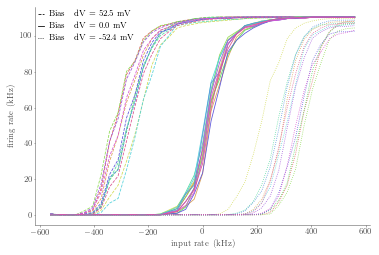

In [135]:
mmnt = 0
n_params = 0
figure = plt.figure()
plt.ylabel("firing rate (kHz)")
plt.xlabel("input rate (kHz)")
figure.gca().set_prop_cycle(color=colors)
styles = ["--", "-", ":"]
    
for i, thres in enumerate(thresholds[mmnt]):
    plt.plot(input_rates,data[mmnt,i,:,0:12], linestyle=styles[i])

plt.legend([Line2D([0],[0], marker='', linestyle=style, color="black") for style in styles],
           ["Bias ~ dV = {} mV".format(np.round(workpoint - t,1)) for t in thresholds[mmnt]], loc="upper left")

plt.savefig("bias_for_activation_function.png",transparent=True, bbox_inches="tight")

In [136]:
thresholds

[(486.3, 538.8, 591.2), (451.3, 538.8, 626.2), (468.8, 538.8, 608.7)]

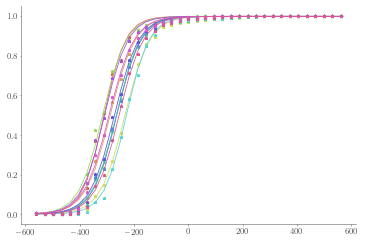

In [138]:
def fsigmoid(x, a, b):
    return 1.0 / (1.0 + np.exp(-a*(x-b)))
popt = np.zeros((3,12,2))
fig = plt.figure()
j = 0
for i in range(12):
    y1 = data[mmnt,j,:,i]/np.amax(data[mmnt,j,:,i])
    popt[j,i], pcov1 = curve_fit(fsigmoid, input_rates, y1, method='dogbox', bounds=([0., -1000],[.1, 1000.]))

    plt.plot(input_rates, y1, c=colors[i], ls='', marker='*')
    plt.plot(input_rates, fsigmoid(input_rates, *popt[j,i]), c=colors[i])


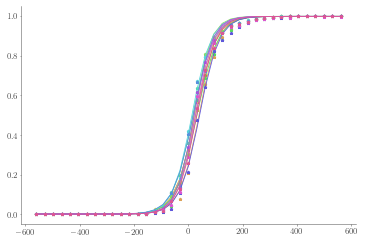

In [139]:
j = 1
for i in range(12):
    y1 = data[mmnt,j,:,i]/np.amax(data[mmnt,j,:,i])
    popt[j,i], pcov1 = curve_fit(fsigmoid, input_rates, y1, method='dogbox', bounds=([0., -1000],[.1, 1000.]))

    plt.plot(input_rates, y1, c=colors[i], ls='', marker='*')
    plt.plot(input_rates, fsigmoid(input_rates, *popt[j,i]), c=colors[i])


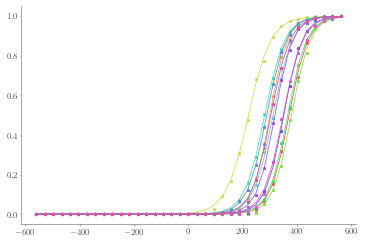

In [140]:
j = 2
for i in range(12):
    y1 = data[mmnt,j,:,i]/np.amax(data[mmnt,j,:,i])
    popt[j,i], pcov1 = curve_fit(fsigmoid, input_rates, y1, method='dogbox', bounds=([0., -1000],[.1, 1000.]))

    plt.plot(input_rates, y1, c=colors[i], ls='', marker='*')
    plt.plot(input_rates, fsigmoid(input_rates, *popt[j,i]), c=colors[i])

threshold: (486.3, 538.8, 591.2) mV, thus DAC: [270, 300, 330]
[300.37587025 294.04483078]
30.266198752119003
[[336.75887194 326.65784843 257.60434639 335.82679592 296.12321279
  281.23841117 240.85685055 281.28448055 313.20757912 329.95279907
  319.08864529 285.9106018 ]
 [344.17741487 260.79379169 196.89902052 358.85419631 333.92204034
  264.31385663 298.4780833  270.47595804 309.7029928  296.73334403
  321.64401644 272.54325435]]
the average change in frequency per dV = 52.5 mV or dDAC = 30 is  297.210350514872 +- 37.08856949205415 kHz
the average change in frequency per dV = 1.75 mV or dDAC = 1 is  9.9 +- 1.2 kHz


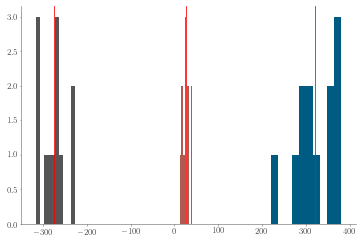

In [141]:
# for mmnt 0: thus for dV = 52.5
print("threshold:", thresholds[0], "mV, thus DAC:", [270,300,330])
fig = plt.figure()
for j in range(3):
    plt.hist(popt[j,:,1])
    plt.axvline(popt[j,:,1].mean(), color='r')
    
dnu = np.diff(popt[:,:,1], axis=0)
dnu_mean = dnu.mean()
dnu_std = dnu.std()


print(np.diff(popt[:,:,1].mean(axis=1))) 
print(np.linalg.norm(popt[:,:,1].std(axis=1))/np.sqrt(3))
print(dnu)
print("the average change in frequency per dV = 52.5 mV or dDAC = 30 is ", dnu_mean,"+-", dnu_std, "kHz")
print("the average change in frequency per dV = 1.75 mV or dDAC = 1 is ", np.round(dnu_mean/30, 1),"+-", np.round(dnu_std/30, 1), "kHz")

In [128]:
52.5/30

1.75

In [109]:
popt[:,:,1]

array([[-714.07064846, -661.63996652, -536.53107624, -725.42618187,
        -608.42055495, -609.08143276, -524.12627235, -605.89860251,
        -625.58387059, -709.12343505, -671.62356554, -586.08105048],
       [  60.47473021,   89.67308061,   55.95891482,   46.97541499,
          72.66282453,   37.76691923,   29.84449021,   41.05569171,
          94.79357885,   49.76831042,   62.2802321 ,   71.51334075],
       [ 852.08278721,  689.49876727,  508.8266712 ,  872.34009797,
         840.6835228 ,  645.68880696,  716.34414323,  663.15040305,
         807.11044405,  732.25491048,  802.06152135,  698.36285047]])

<IPython.core.display.Javascript object>


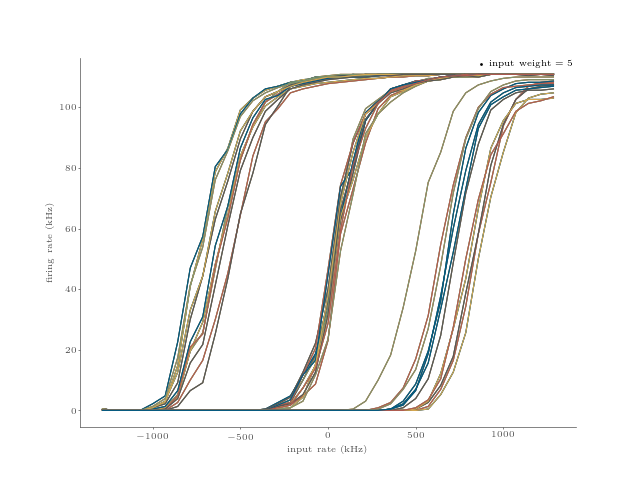

In [16]:
mmnt = 0
n_params = 0
figure = plt.figure()
plt.ylabel("firing rate (kHz)")
plt.xlabel("input rate (kHz)")
for i, thres in enumerate(thresholds[mmnt]):
    plt.plot(input_rates,data[mmnt,i,:,0:12])
    plt.plot(input_rates,data[mmnt,i,:,0:12])
    plt.plot(input_rates,data[mmnt,i,:,0:12])

plt.legend([Line2D([0],[0], marker='o', color="w", markerfacecolor="black")],["input weight = {}".format(input_weights[n_params])])

plt.savefig("calibrated_activation_function_input_w{}.png".format(input_weights[n_params]),transparent=True, bbox_inches="tight")